# Churn Modeling

Welcome to the Churn Modeling Project! In this project, we aim to predict customer churn, which refers to the phenomenon where customers discontinue using a service or product. Predicting churn is crucial for businesses to identify and retain valuable customers, as well as to optimize marketing strategies.

## Project Overview

Customer churn can have a significant impact on a company's revenue and growth. By leveraging machine learning techniques, we can develop predictive models that analyze various customer attributes and behaviors to forecast whether a customer is likely to churn. In this project, we will build a churn prediction model using a dataset containing customer information, subscription details, usage patterns, and historical churn data.

## Dataset

The dataset we'll be using contains a collection of features that provide insights into customer behavior and demographics. These features include age, gender, location, subscription length, monthly billing amount, total usage in gigabytes, and whether the customer has previously churned.

## Project Workflow

1. **Data Preprocessing**: We'll start by loading and exploring the dataset. We'll handle any missing data, encode categorical variables, and prepare the data for modeling.

2. **Exploratory Data Analysis**: We'll visualize and analyze the data to gain insights into the relationships between different features and churn rates. This step will help us understand the dataset better and identify potential patterns.

3. **Feature Engineering**: We'll create new features or transform existing ones to improve the performance of our prediction model. This might involve scaling features, creating interaction terms, or deriving relevant ratios.

4. **Model Building**: Using machine learning algorithms, we'll train and evaluate different churn prediction models. We'll split the data into training and testing sets and employ techniques such as logistic regression, decision trees, random forests, and gradient boosting.

5. **Model Evaluation**: We'll assess the models' performance using appropriate metrics such as accuracy, precision, recall, and F1-score. We'll also consider techniques like cross-validation to ensure our models generalize well to new data.

6. **Model Deployment**: Once we've selected the best-performing model, we'll deploy it using a web application. This application will allow users to input customer information and receive churn predictions in real-time.

7. **Conclusion**: We'll summarize the project's findings, discuss the implications of the churn prediction model for businesses, and provide insights for future improvements.

## Project Goals

- Develop an accurate churn prediction model to identify potential churners.
- Provide a user-friendly web application for real-time churn predictions.
- Offer insights into customer behaviors that contribute to churn.
- Explore different machine learning algorithms and techniques for improving model performance.

Let's get started with the exciting journey of predicting customer churn and helping businesses retain their valuable customers!


In [1]:
!mkdir Churn_Modeling

In [2]:
%cd Churn_Modeling

C:\Users\User\Churn_Modeling


In [3]:
!mkdir templates

In [5]:
!type nul > templates\index.html

In [57]:
%cd ..

C:\Users\User


# Import Libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from flask import Flask, request, render_template
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Data import and Preprocessing

In [2]:
#Import the excel dataset file
df = pd.read_excel('customer_churn_large_dataset.xlsx')

In [3]:
df

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0
...,...,...,...,...,...,...,...,...,...
99995,99996,Customer_99996,33,Male,Houston,23,55.13,226,1
99996,99997,Customer_99997,62,Female,New York,19,61.65,351,0
99997,99998,Customer_99998,64,Male,Chicago,17,96.11,251,1
99998,99999,Customer_99999,51,Female,New York,20,49.25,434,1


##### So the dataset contains both categorical and numeric variables. Also the output variable is a binary dummy variable. Moreover we donnot need CustomerID column for this study. We will drop it and set Name column as an index to the dataset

In [4]:
#Drop the column and set other column as an index
df.drop('CustomerID', axis=1, inplace=True)
df.set_index('Name',inplace=True)

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64


In [8]:
# Check for outliers
def detect_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (col < lower_bound) | (col > upper_bound)

outliers = df.select_dtypes(include=["int64", "float64"]).apply(detect_outliers)
print("Outliers:\n", outliers)
print(outliers.sum())

Outliers:
                    Age  Subscription_Length_Months  Monthly_Bill  \
Name                                                               
Customer_1       False                       False         False   
Customer_2       False                       False         False   
Customer_3       False                       False         False   
Customer_4       False                       False         False   
Customer_5       False                       False         False   
...                ...                         ...           ...   
Customer_99996   False                       False         False   
Customer_99997   False                       False         False   
Customer_99998   False                       False         False   
Customer_99999   False                       False         False   
Customer_100000  False                       False         False   

                 Total_Usage_GB  Churn  
Name                                    
Customer_1            

##### We are good to go as we have no missing values and no outliers

# Data Visualization

#### Create some visualizations and let us see the data structure and the relationships

AxesSubplot(0.125,0.125;0.775x0.755)


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


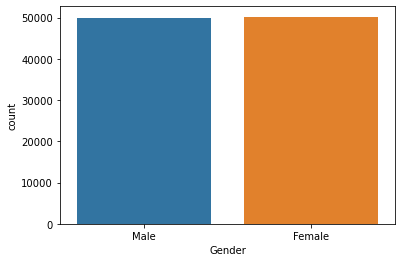

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
print(sns.countplot(df['Gender']))

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AxesSubplot(0.125,0.125;0.775x0.755)


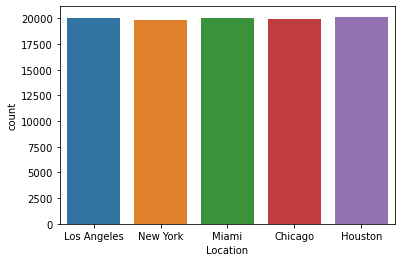

In [13]:
print(sns.countplot(df['Location']))

####  With respect to Gender and Location, we have a balanced dataset and donnot need to apply any resampling methods

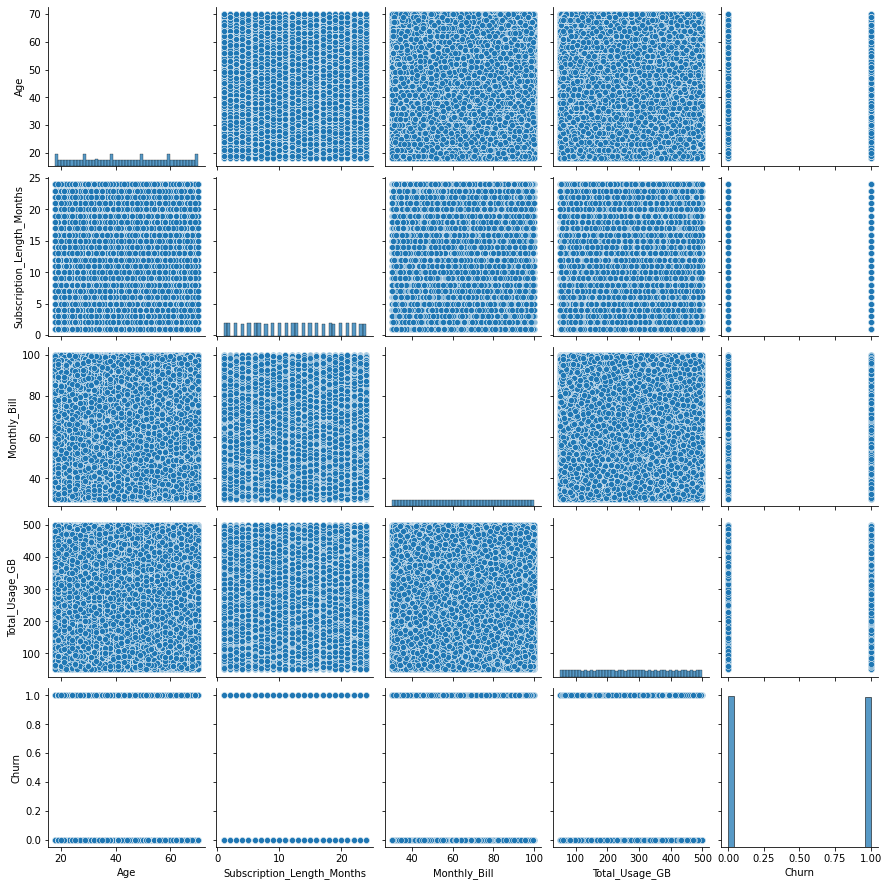

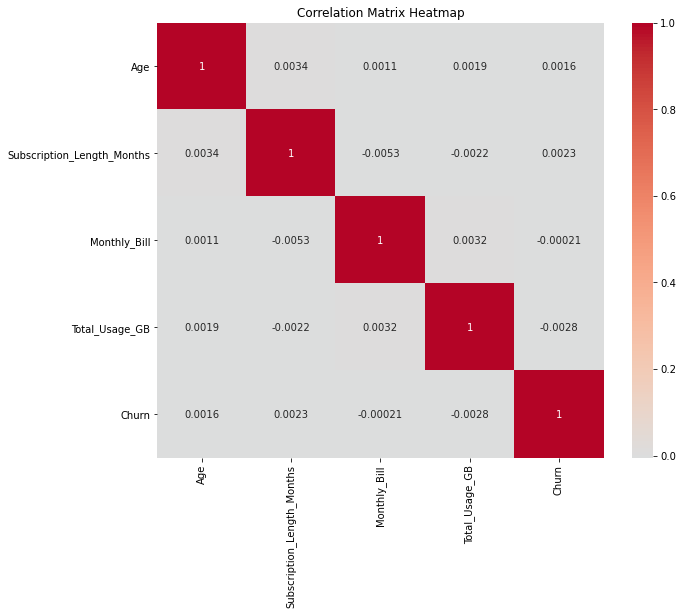

In [14]:
#Plot a Pairplot and a Heatmap and see the correlations among the variables
# Selecting the relevant columns
selected_columns = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB','Churn']
selected_data = df[selected_columns]

# Pairplot to visualize relationships
sns.pairplot(selected_data)
plt.show()

# Correlation matrix heatmap
correlation_matrix = selected_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### We have a simple dataset with no visible trends between any of the variables and most unfortunate the output variable "Churn" is not correlated with any of its independent variables so the variables will not be providing much information in prediction the Churn output.

In [15]:
# Label the categorical variables 

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical Gender column to numerical using label encoding
df["Gender"] = label_encoder.fit_transform(df["Gender"])

# Convert categorical Location column to numerical using label encoding
df["Location"] = label_encoder.fit_transform(df["Location"])

In [16]:
df
#We could see the columns have been labelled as dummies

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
Name,,,,,,,
Customer_1,63,1,2,17,73.36,236,0
Customer_2,62,0,4,1,48.76,172,0
Customer_3,24,0,2,5,85.47,460,0
Customer_4,36,0,3,3,97.94,297,1
Customer_5,46,0,3,19,58.14,266,0
...,...,...,...,...,...,...,...
Customer_99996,33,1,1,23,55.13,226,1
Customer_99997,62,0,4,19,61.65,351,0
Customer_99998,64,1,0,17,96.11,251,1


# Train Test Split

In [17]:
# Step 2: Splitting Data
X = df.drop(columns=["Churn"])  # Features
y = df["Churn"]  # Target variable

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Building and Evaluation

#### We will be building three popular algorithms for classification of the customers as Logistic Regression, Random Forest and XGBoost and select the best among them for deployment.

In [49]:
# Define a list of models to train
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier()),
    ('XGBoost', XGBClassifier())
]

In [50]:
# Initialize variables to track the best model and its accuracy
best_model = None
best_accuracy = 0.0
# Loop through each model
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.4f}')
    
    # Check if this model has the highest accuracy so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model_name
        joblib.dump(model, 'best_model.pkl')
print(f'Best Model: {best_model} with Accuracy: {best_accuracy:.4f}')

Logistic Regression Accuracy: 0.5001
Random Forest Accuracy: 0.4967
XGBoost Accuracy: 0.4997
Best Model: Logistic Regression with Accuracy: 0.5001


#### As expected and already stated above that the output variable is least affected by the features as their is no correlations between any of them. But we can try increasing the accuracy by Feature Engineering and adding some extra features to the datasetd.
### In above code we have dumped the best model as a pkl file into the directory which will be used when deploying it online.

# Feature Engineering

In [19]:
# Feature engineering: Creating a number of new related features
df['Bill_Per_Usage'] = df['Monthly_Bill'] / df['Total_Usage_GB']
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 30, 60, float('inf')], labels=['Young', 'Middle-aged', 'Senior'])
df['Usage_Per_Length'] = df['Total_Usage_GB'] / df['Subscription_Length_Months']
df['Bill_Per_Length'] = df['Monthly_Bill'] / df['Subscription_Length_Months']
df['Usage_Bill_Ratio'] = df['Total_Usage_GB'] / df['Monthly_Bill']
df['Usage_Bill_Interact'] = df['Total_Usage_GB'] * df['Monthly_Bill']

In [20]:
df

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Bill_Per_Usage,Age_Group,Usage_Per_Length,Bill_Per_Length,Usage_Bill_Ratio,Usage_Bill_Interact
Name,,,,,,,,,,,,,
Customer_1,63,1,2,17,73.36,236,0,0.310847,Senior,13.882353,4.315294,3.217012,17312.96
Customer_2,62,0,4,1,48.76,172,0,0.283488,Senior,172.000000,48.760000,3.527482,8386.72
Customer_3,24,0,2,5,85.47,460,0,0.185804,Young,92.000000,17.094000,5.382005,39316.20
Customer_4,36,0,3,3,97.94,297,1,0.329764,Middle-aged,99.000000,32.646667,3.032469,29088.18
Customer_5,46,0,3,19,58.14,266,0,0.218571,Middle-aged,14.000000,3.060000,4.575163,15465.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Customer_99996,33,1,1,23,55.13,226,1,0.243938,Middle-aged,9.826087,2.396957,4.099401,12459.38
Customer_99997,62,0,4,19,61.65,351,0,0.175641,Senior,18.473684,3.244737,5.693431,21639.15
Customer_99998,64,1,0,17,96.11,251,1,0.382908,Senior,14.764706,5.653529,2.611591,24123.61


In [21]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Age_Group' column
df['Age_Group'] = label_encoder.fit_transform(df['Age_Group'])

#### Before going for model building let us see the correlation matrix and decide if we should go further.

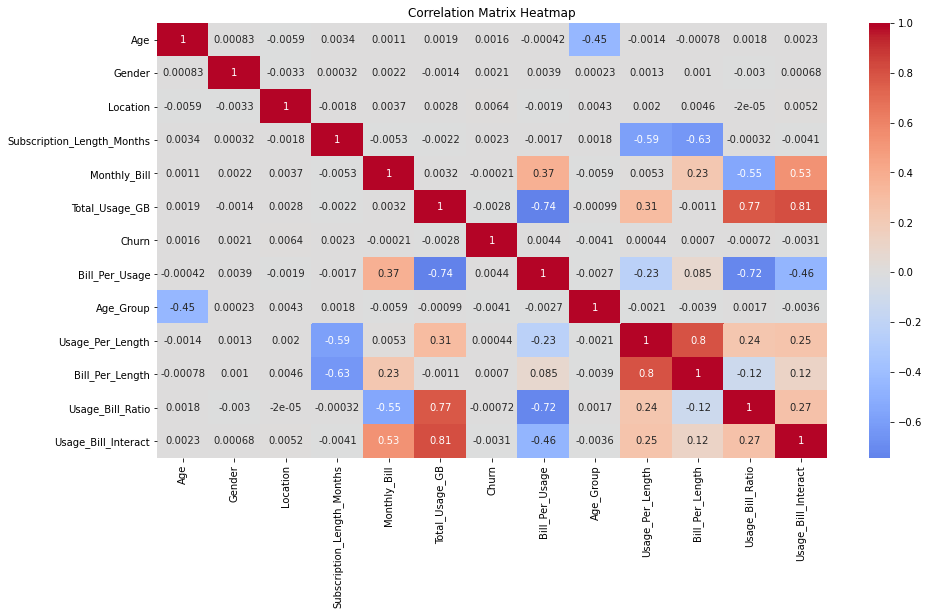

In [22]:
# Correlation matrix heatmap

correlation_matrix = df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Unfortunately not, The new features are also not showing any correlation with the output variable. So we will go for deploying the best model i,e Logistic Model interms of its accuracy.

In [24]:
# List of columns to drop
columns_to_drop = ['Bill_Per_Usage', 'Age_Group', 'Usage_Per_Length', 'Bill_Per_Length', 'Usage_Bill_Ratio', 'Usage_Bill_Interact']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [25]:
df

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
Name,,,,,,,
Customer_1,63,1,2,17,73.36,236,0
Customer_2,62,0,4,1,48.76,172,0
Customer_3,24,0,2,5,85.47,460,0
Customer_4,36,0,3,3,97.94,297,1
Customer_5,46,0,3,19,58.14,266,0
...,...,...,...,...,...,...,...
Customer_99996,33,1,1,23,55.13,226,1
Customer_99997,62,0,4,19,61.65,351,0
Customer_99998,64,1,0,17,96.11,251,1


# Model Deployment

#### Before deploying the flask app online we have to nake a directory containing the model pkl file and an index.html file under templates folder
#### I have already done that now we will have to select the created directory as our working directory to run the app.

In [27]:
%cd Churn_Modeling

C:\Users\User\Churn_Modeling


In [ ]:
from flask import Flask, request, render_template
import joblib
import numpy as np

app = Flask(__name__)

# Load the best trained model
best_model = joblib.load('best_model.pkl')

# Location label mapping
location_mapping = {
    'Los Angeles': 0,
    'New York': 1,
    'Miami': 2,
    'Chicago': 3,
    'Houston': 4
}

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get input values from the form
        age = int(request.form['age'])
        gender = request.form['gender']
        location = request.form['location']
        subscription_months = int(request.form['subscription_months'])
        monthly_bill = float(request.form['monthly_bill'])
        total_usage_gb = float(request.form['total_usage_gb'])
        
        # Prepare the input data for prediction
        gender_encoded = 1 if gender == 'Male' else 0
        location_encoded = location_mapping[location]
        
        input_features = [age, subscription_months, monthly_bill, total_usage_gb, gender_encoded, location_encoded]
        
        # Make a prediction
        prediction = best_model.predict([input_features])[0]
        
        # Convert prediction to human-readable format
        churn_label = 'Churn' if prediction == 1 else 'Not Churn'
        
        return render_template('index.html', prediction=churn_label)
    except Exception as e:
        return render_template('index.html', error=str(e))

if __name__ == '__main__':
    app.run(debug=True, use_reloader=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [24/Aug/2023 23:53:38] "GET / HTTP/1.1" 200 -
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [24/Aug/2023 23:53:56] "POST /predict HTTP/1.1" 200 -


# Conclusion
#### We successfully deployed the model online. Although the accuracy is not sufficient but the dataset has some limited features which cannot be used to increase the accuracy of any model. This churn modeling project showcases the power of data science in solving business challenges. By combining data preprocessing, feature engineering, model selection, and deployment, we created a holistic solution that aids in predicting customer churn. As businesses increasingly rely on data-driven decision-making, the insights derived from this project can play a pivotal role in minimizing churn, enhancing customer satisfaction, and optimizing business operations